# Auto MPG Dataset – Linear & Multiple Linear Regression
Dataset: https://www.kaggle.com/datasets/uciml/autompg-dataset  
Goal: Predict **miles per gallon (mpg)** using car attributes  
Reference style: Similar to Fish weight prediction example

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline

In [3]:
# Step 2: Load the data
# Download from Kaggle → extract → place file in your folder
# File is usually named auto-mpg.csv

# Change path to your actual location
df = pd.read_csv('auto-mpg.csv')  # or r'C:\your\path\auto-mpg.csv'

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head(3)

Shape: (398, 9)

Columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [13]:
# Step 3: Data cleaning – MUST run this before features
print("Original missing values:\n", df.isnull().sum())

# Fix horsepower: '?' → NaN → fill with median
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Drop car name (text, not useful)
if 'car name' in df.columns:
    df = df.drop(columns=['car name'])

# Final check – should be 0 missing
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Horsepower stats to confirm
print("\nHorsepower stats:\n", df['horsepower'].describe().round(2))

Original missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

Missing values after cleaning:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

Horsepower stats:
 count    398.00
mean     104.30
std       38.22
min       46.00
25%       76.00
50%       93.50
75%      125.00
max      230.00
Name: horsepower, dtype: float64


In [14]:
# Step 4: Simple Linear Regression (one feature: weight)
X_simple = df[['weight']]  # Heavier car → lower mpg
y = df['mpg']              # Target

print("X_simple shape:", X_simple.shape)
print("y shape:", y.shape)

# Model
lr_simple = LinearRegression()
lr_simple.fit(X_simple, y)

y_pred_simple = lr_simple.predict(X_simple)

print("Coefficient (slope):", lr_simple.coef_[0].round(4))
print("Intercept:", lr_simple.intercept_.round(2))

X_simple shape: (398, 1)
y shape: (398,)
Coefficient (slope): -0.0077
Intercept: 46.32


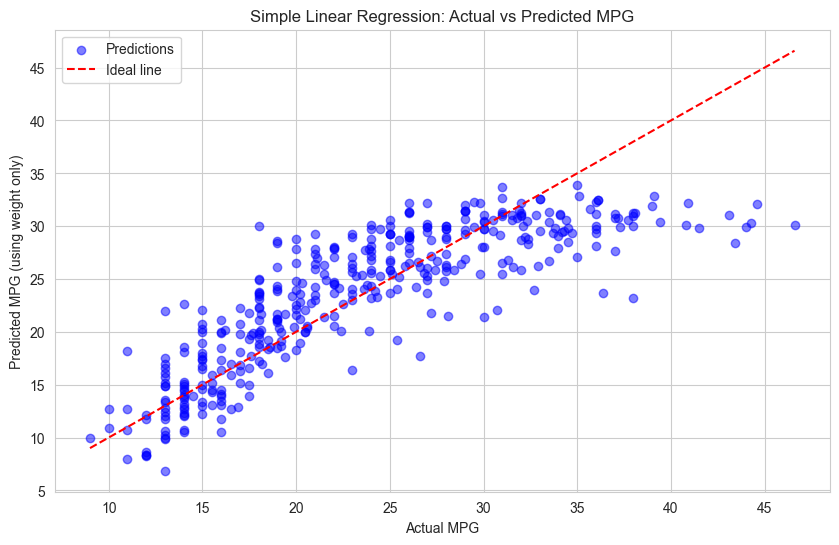

In [15]:
# Step 5: Visualize Simple LR – Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_simple, color='blue', alpha=0.5, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal line')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG (using weight only)')
plt.title('Simple Linear Regression: Actual vs Predicted MPG')
plt.legend()
plt.show()

In [17]:
# Step 6: Multiple Linear Regression features
features = ['cylinders', 'displacement', 'horsepower', 'weight', 
            'acceleration', 'origin']

X_multi = df[features]
y = df['mpg']

# Safety check – must be False / 0
print("Any NaN in X_multi?", X_multi.isnull().any().any())
print("Any NaN in y?", y.isnull().any())
print("X_multi shape:", X_multi.shape)
display(X_multi.head(3))

Any NaN in X_multi? False
Any NaN in y? False
X_multi shape: (398, 6)


,cylinders,displacement,horsepower,weight,acceleration,origin
0,8,307.0,130.0,3504,12.0,1
1,8,350.0,165.0,3693,11.5,1
2,8,318.0,150.0,3436,11.0,1


In [18]:
# Step 7: Train Multiple Linear Regression model
# THIS CREATES mlr_model – run this before coefficients!
mlr_model = LinearRegression()
mlr_model.fit(X_multi, y)

print("Model trained successfully!")  # Confirmation
print("Intercept:", mlr_model.intercept_.round(2))
print("Raw coefficients:", mlr_model.coef_.round(4))

Model trained successfully!
Intercept: 42.97
Raw coefficients: [-0.5325  0.0113 -0.0563 -0.005  -0.0118  1.4539]


In [19]:
# Step 8: Coefficients for each feature
# This uses mlr_model – make sure Step 7 ran first!
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': mlr_model.coef_
}).round(4).sort_values('Coefficient', ascending=False)

display(coef_df)

,Feature,Coefficient
5,origin,1.4539
1,displacement,0.0113
3,weight,-0.0050
4,acceleration,-0.0118
2,horsepower,-0.0563
0,cylinders,-0.5325


In [20]:
# Step 9: Make predictions (full data)
y_pred_multi = mlr_model.predict(X_multi)

print("First 5 Actual MPG:", y[:5].values)
print("First 5 Predicted MPG:", y_pred_multi[:5].round(2))

First 5 Actual MPG: [18. 15. 18. 16. 17.]
First 5 Predicted MPG: [18.51 16.08 17.87 17.71 18.19]


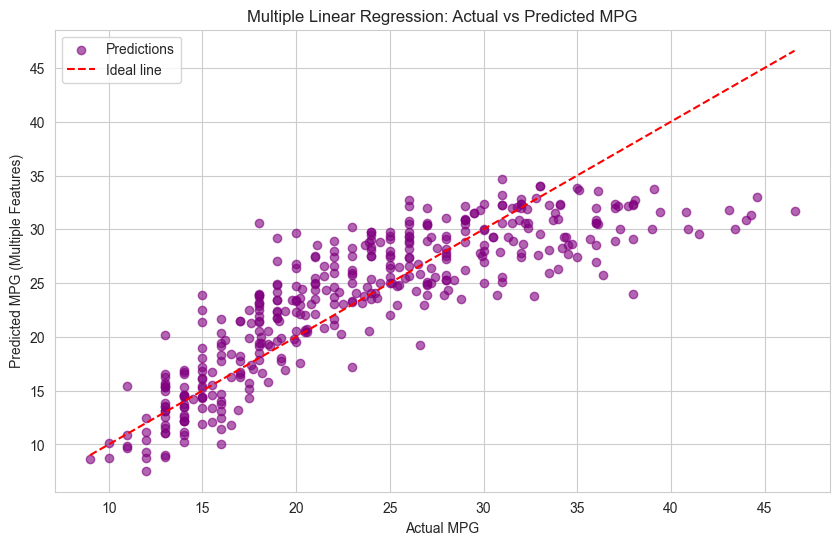

In [21]:
# Step 10: Visualization – Actual vs Predicted (Multiple LR)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_multi, color='purple', alpha=0.6, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal line')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG (Multiple Features)')
plt.title('Multiple Linear Regression: Actual vs Predicted MPG')
plt.legend()
plt.show()

In [22]:
# Step 11: Evaluation metrics
r2 = r2_score(y, y_pred_multi)
mse = mean_squared_error(y, y_pred_multi)
rmse = np.sqrt(mse)

print(f"R² Score (Accuracy): {r2:.4f}  → model explains {r2*100:.1f}% of variance")
print(f"RMSE: {rmse:.2f} MPG  → average prediction error about {rmse:.1f} miles per gallon")

R² Score (Accuracy): 0.7181  → model explains 71.8% of variance
RMSE: 4.14 MPG  → average prediction error about 4.1 miles per gallon


In [23]:
# Optional Step 12: Better evaluation with train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

mlr_split = LinearRegression()
mlr_split.fit(X_train, y_train)

y_pred_test = mlr_split.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.2f} MPG")

Test R²: 0.7440
Test RMSE: 3.71 MPG
